# Feature Engineering Assignments

**Today's Exercises:**
- Feature Scaling & Transformation
- Feature Encoding (Categorical Data)
- Feature Cleaning & Imputation

### Importing Libraries & Datasets

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [160]:
data = pd.read_csv('stackoverflow.csv')

In [161]:
data

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"
...,...,...,...,...,...,...,...,...,...,...,...
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,France,NaN,Subversion,45,10,Male,NaN
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,Spain,8.0,Git,27,16,Male,"58,746.00"
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,USA,NaN,Git,54,16,Male,"$55,000.00"
997,2/5/18 20:01,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,Sweeden,NaN,Git;Subversion,23,9,NaN,NaN


In [163]:
data.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [164]:
from pandas_profiling import ProfileReport

C:\Users\Sarah\AppData\Local\Temp\ipykernel_13712\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [165]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


==========

## Feature Cleaning & Imputation Exercises

##### Q. Check for any missing data in the 'RawSalary' column and handle them wisely

In [167]:
(data.isnull()).sum()

SurveyDate                      0
FormalEducation                 0
ConvertedSalary               334
Hobby                           0
Country                         0
StackOverflowJobsRecommend    512
VersionControl                  0
Age                             0
Years Experience                0
Gender                        306
RawSalary                     334
dtype: int64

In [168]:
from sklearn.impute import MissingIndicator

In [173]:
ms=MissingIndicator()

In [178]:
ms.fit_transform(data[['RawSalary']]).sum()

334

In [183]:
# for non missing data use ~
data[~(ms.fit_transform(data[['RawSalary']]))]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"
5,2/9/18 19:09,Some college/university study without earning ...,120000.0,Yes,Russia,7.0,Git,39,2,Male,"120,000.00"
7,10/16/18 23:36,Some college/university study without earning ...,250000.0,Yes,France,7.0,Git,24,2,Female,"250,000.00"
...,...,...,...,...,...,...,...,...,...,...,...
991,7/14/18 4:51,Master's degree (MA. MS. M.Eng.. MBA. etc.),55562.0,Yes,Sweeden,9.0,Git,34,1,NaN,"55,562.00"
993,3/4/18 19:11,Some college/university study without earning ...,30000.0,Yes,India,0.0,Git,28,5,Male,"30,000.00"
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,Spain,8.0,Git,27,16,Male,"58,746.00"
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,USA,NaN,Git,54,16,Male,"$55,000.00"


In [186]:
from sklearn.impute import SimpleImputer

In [189]:
ss=SimpleImputer()

In [205]:
data['RawSalary']=ss.fit_transform(data[['RawSalary']])

In [206]:
data['RawSalary']

0        92565.169925
1        70841.000000
2        92565.169925
3        21426.000000
4        41671.000000
            ...      
994      92565.169925
995      58746.000000
996      55000.000000
997      92565.169925
998    1000000.000000
Name: RawSalary, Length: 999, dtype: float64

In [192]:
data['RawSalary'].dtype

dtype('O')

In [201]:
data['RawSalary']=data['RawSalary'].astype('float')

In [202]:
data['RawSalary']

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64

In [198]:
data['RawSalary']=data['RawSalary'].str.replace('£','').str.replace('$','').str.replace(',','')

C:\Users\Sarah\AppData\Local\Temp\ipykernel_13712\2313511972.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['RawSalary']=data['RawSalary'].str.replace('£','').str.replace('$','').str.replace(',','')


In [199]:
data['RawSalary']

0             NaN
1        70841.00
2             NaN
3        21426.00
4        41671.00
          ...    
994           NaN
995      58746.00
996      55000.00
997           NaN
998    1000000.00
Name: RawSalary, Length: 999, dtype: object

In [73]:
data['ConvertedSalary']

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: ConvertedSalary, Length: 999, dtype: float64

In [74]:
from sklearn.impute import SimpleImputer

In [146]:
sm=SimpleImputer()

In [149]:
data['ConvertedSalary']=sm.fit_transform(data[['ConvertedSalary']])

In [150]:
data['ConvertedSalary']

0        92565.169925
1        70841.000000
2        92565.169925
3        21426.000000
4        41671.000000
            ...      
994      92565.169925
995      58746.000000
996      55000.000000
997      92565.169925
998    1000000.000000
Name: ConvertedSalary, Length: 999, dtype: float64

In [151]:
data['ConvertedSalary'].mean()

92565.16992481163

In [152]:
from sklearn.impute import MissingIndicator

In [153]:
mi=MissingIndicator()

In [158]:
data['ConvertedSalary']=mi.fit_transform(data[['ConvertedSalary']])

##### Q. Check for any outliers in the 'RawSalary' column and handle them wisely

<AxesSubplot:>

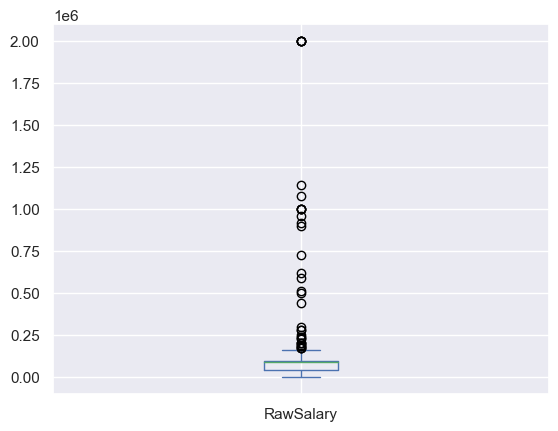

In [207]:
data['RawSalary'].plot.box()

In [210]:
data=data[data['RawSalary']<200000]

<AxesSubplot:>

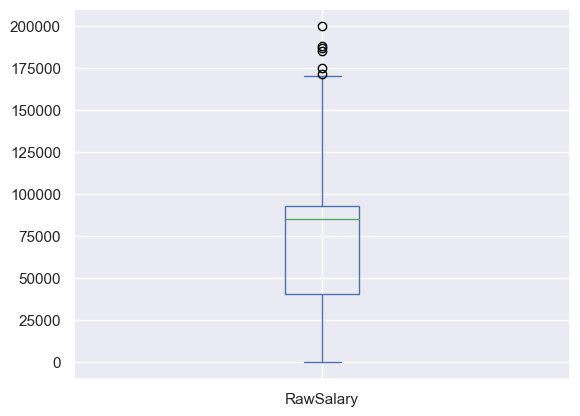

In [211]:
data['RawSalary'].plot.box()

<AxesSubplot:>

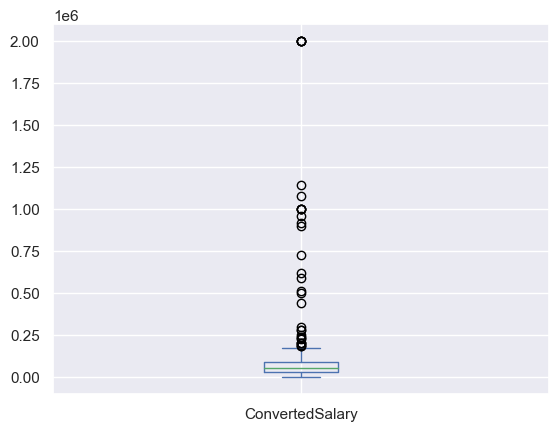

In [81]:
data['ConvertedSalary'].plot.box()

In [89]:
q1=data['ConvertedSalary'].quantile(0.25)
q1

27550.0

In [90]:
q3=data['ConvertedSalary'].quantile(0.75)
q3


88238.0

In [91]:
iqr=q3-q1
iqr

60688.0

In [92]:
min_out=q1-1.5*iqr
min_out

-63482.0

In [93]:
max_out=q3+1.5*iqr
max_out

179270.0

In [133]:
woo=data[ (data['ConvertedSalary']>=min_out) & (data['ConvertedSalary']<=max_out) ]


In [142]:
woo['ConvertedSalary'].argmax()

303

In [143]:
woo.iloc[303,:]

SurveyDate                                                9/20/18 7:51
FormalEducation               Bachelor's degree (BA. BS. B.Eng.. etc.)
ConvertedSalary                                               175000.0
Hobby                                                                1
Country                                                         Russia
StackOverflowJobsRecommend                                         NaN
VersionControl                                                     Git
Age                                                                 34
Years Experience                                                    10
Gender                                                               4
RawSalary                                                   175,000.00
Name: 468, dtype: object

In [134]:
woo

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,1,Sweeden,7.0,Git;Subversion,38,9,4,"70,841.00"
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,1,Sweeden,NaN,Zip file back-ups,46,12,4,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,1,UK,8.0,Git,39,7,4,"£41,671.00"
5,2/9/18 19:09,Some college/university study without earning ...,120000.0,1,Russia,7.0,Git,39,2,4,"120,000.00"
9,2/24/18 21:36,Secondary school (e.g. American high school. G...,0.0,0,France,NaN,Copying and pasting files to network shares,36,2,8,0.00
...,...,...,...,...,...,...,...,...,...,...,...
988,8/9/18 12:26,Master's degree (MA. MS. M.Eng.. MBA. etc.),50448.0,1,Russia,2.0,Git;Team Foundation Version Control,18,4,8,"50,448.00"
991,7/14/18 4:51,Master's degree (MA. MS. M.Eng.. MBA. etc.),55562.0,1,Sweeden,9.0,Git,34,1,8,"55,562.00"
993,3/4/18 19:11,Some college/university study without earning ...,30000.0,1,India,0.0,Git,28,5,4,"30,000.00"
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,0,Spain,8.0,Git,27,16,4,"58,746.00"


<AxesSubplot:>

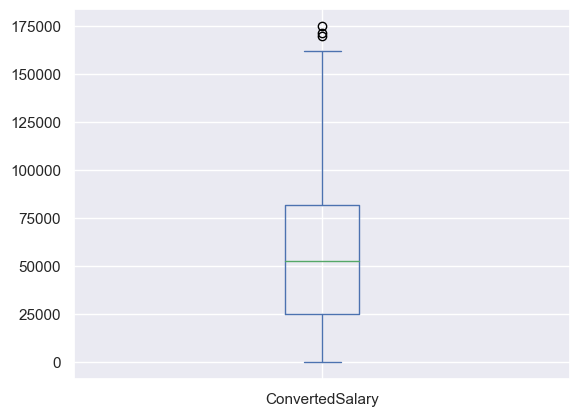

In [145]:
woo['ConvertedSalary'].plot.box()

In [102]:
data[(data['ConvertedSalary']>=179270)]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
7,10/16/18 23:36,Some college/university study without earning ...,250000.0,Yes,France,7.0,Git,24,2,Female,"250,000.00"
19,9/3/18 19:11,Bachelor's degree (BA. BS. B.Eng.. etc.),900000.0,No,Spain,1.0,Team Foundation Version Control,39,10,NaN,"900,000.00"
90,7/12/18 8:01,Some college/university study without earning ...,916764.0,Yes,France,2.0,Git,51,8,Male,"916,764.00"
93,10/11/18 17:09,Bachelor's degree (BA. BS. B.Eng.. etc.),228888.0,No,Russia,10.0,Git,33,6,Male,"228,888.00"
147,7/7/18 15:17,Bachelor's degree (BA. BS. B.Eng.. etc.),1080000.0,Yes,India,8.0,Git,24,12,Male,"1,080,000.00"
169,2/9/18 1:40,Bachelor's degree (BA. BS. B.Eng.. etc.),1140000.0,Yes,Sweeden,NaN,Subversion,38,13,Male,"1,140,000.00"
178,10/14/18 22:41,Other doctoral degree (Ph.D. Ed.D.. etc.),440592.0,Yes,USA,7.0,Git;Team Foundation Version Control,26,15,Male,"$440,592.00"
202,3/24/18 0:36,Some college/university study without earning ...,2000000.0,Yes,Russia,10.0,Git,31,15,Male,"2,000,000.00"
234,3/28/18 14:20,Bachelor's degree (BA. BS. B.Eng.. etc.),185000.0,Yes,Sweeden,8.0,Git,32,11,Male,"185,000.00"
245,6/14/18 5:49,Bachelor's degree (BA. BS. B.Eng.. etc.),187152.0,Yes,France,10.0,Git,19,13,NaN,"187,152.00"


==========

## Feature Scaling & Normalizing Exercises

##### Q. Let's scale / normalize the data in the 'Age' column

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
ss=StandardScaler()

In [108]:
ss.fit_transform(data[['Age']])

array([[-1.13243108e+00],
       [ 1.50733921e-01],
       [ 6.79095982e-01],
       [ 7.54576276e-01],
       [ 2.26214216e-01],
       [ 2.26214216e-01],
       [-1.51187256e-01],
       [-9.05990200e-01],
       [-9.81470494e-01],
       [-2.26667551e-04],
       [-7.55029611e-01],
       [ 4.52655099e-01],
       [-1.35887197e+00],
       [-3.77628139e-01],
       [-1.13243108e+00],
       [-1.05695079e+00],
       [ 3.77174804e-01],
       [ 1.43389893e+00],
       [-3.77628139e-01],
       [ 2.26214216e-01],
       [-1.28339167e+00],
       [-6.04069023e-01],
       [ 1.05649745e+00],
       [-1.35887197e+00],
       [-1.35887197e+00],
       [-4.53108434e-01],
       [ 2.33966246e+00],
       [ 2.26214216e-01],
       [-7.57069619e-02],
       [ 3.77174804e-01],
       [-4.53108434e-01],
       [ 5.28135393e-01],
       [ 1.50733921e-01],
       [-7.57069619e-02],
       [ 4.52655099e-01],
       [ 1.20745804e+00],
       [ 1.81130040e+00],
       [ 2.64158364e+00],
       [-1.5

==========

## Feature Encoding Exercises

##### Q. How about encoding the data in the 'Hobby' / 'Gender' column

In [214]:
data['Hobby'].value_counts()

Yes    802
No     168
Name: Hobby, dtype: int64

In [216]:
data['Gender'].value_counts()

Male                                                                         614
Female                                                                        51
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64

In [217]:
#data[(data['Gender']=='Female')&(data['Gender']=='Male')]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary


In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
lc=LabelEncoder()

In [129]:
data['Hobby']=lc.fit_transform(data[['Hobby']])

C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
data['Hobby']

0      1
1      1
2      0
3      1
4      1
      ..
994    1
995    0
996    1
997    1
998    0
Name: Hobby, Length: 999, dtype: int64

In [131]:
data['Gender']=lc.fit_transform(data[['Gender']])

C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
data['Gender']

0      4
1      4
2      8
3      4
4      4
      ..
994    4
995    4
996    4
997    8
998    8
Name: Gender, Length: 999, dtype: int32

##### Q. And also, we need to encode the 'Country' column

In [212]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#from sklearn.preprocessing import 

In [119]:
ll=LabelEncoder()

In [122]:
EE=ll.fit_transform(data[['Country']])

C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [123]:
EE

array([4, 6, 6, 6, 7, 3, 7, 0, 4, 0, 5, 8, 1, 8, 2, 7, 7, 8, 8, 5, 4, 8,
       8, 3, 8, 8, 3, 4, 6, 3, 8, 5, 3, 6, 8, 0, 8, 5, 7, 0, 8, 1, 9, 6,
       3, 7, 4, 7, 8, 7, 8, 5, 0, 7, 6, 0, 5, 3, 2, 0, 7, 5, 8, 1, 1, 8,
       8, 0, 4, 3, 3, 4, 8, 2, 4, 5, 4, 6, 3, 3, 7, 9, 0, 9, 0, 4, 3, 5,
       6, 6, 0, 4, 1, 3, 0, 5, 8, 1, 7, 0, 8, 6, 0, 5, 4, 5, 8, 4, 8, 5,
       7, 5, 5, 7, 8, 8, 9, 3, 5, 4, 2, 4, 6, 4, 7, 3, 0, 1, 8, 5, 7, 1,
       7, 5, 1, 6, 7, 6, 6, 5, 6, 5, 4, 8, 7, 4, 4, 1, 1, 3, 6, 8, 1, 5,
       6, 5, 8, 1, 6, 1, 6, 7, 7, 5, 8, 8, 7, 1, 4, 6, 5, 8, 8, 6, 3, 8,
       1, 8, 8, 0, 0, 4, 8, 8, 5, 1, 8, 5, 5, 7, 8, 1, 0, 7, 0, 8, 7, 5,
       6, 3, 8, 3, 3, 0, 0, 8, 5, 8, 4, 0, 8, 8, 5, 6, 5, 0, 3, 9, 6, 7,
       5, 8, 6, 5, 4, 0, 1, 6, 4, 3, 4, 8, 4, 1, 6, 1, 3, 5, 4, 7, 1, 6,
       6, 1, 3, 0, 5, 6, 8, 7, 0, 0, 1, 0, 3, 8, 6, 7, 6, 5, 5, 0, 4, 1,
       8, 0, 3, 5, 3, 8, 8, 0, 3, 8, 6, 6, 3, 0, 4, 4, 6, 5, 1, 1, 4, 8,
       6, 1, 5, 4, 6, 1, 1, 8, 4, 4, 3, 4, 1, 5, 8,

===========

# THANK YOU!